In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import utils as u
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import result_gen_utils as ru
from scipy.stats import norm

# results

1) The fabnet explanation in the bullet point, point 1 needs more explanation.

2) The fabnet smilarity matters because we might not have the same behavior. The VGG threshold should, however, have been introduced in a more principled way.. First show explanability of the faceswap. VGG similarity to my top-1 matters a lot. VGG simialrity has an issue of in-between similarity but not FAb-Net

3) say faceswap and not generic deep fakes

4) Have the T_v explanation of geodesic path explation should go in the authentication section.

5) VGG or FabNet only as baselines


In [2]:
def read_results(in_df_name):
    
    in_df = pd.read_pickle(in_df_name)
    in_df = in_df.reset_index()
    return in_df

In [3]:
result_dfs = {}

result_dfs['ldr_real_100'] = read_results('result_csv/ldr_real_100_halfRepo.csv')
result_dfs['ldr_fake_100'] = read_results('result_csv/ldr_fake_100_halfRepo.csv')
result_dfs['FF_real_100'] = read_results('result_csv/FF_real_100_halfRepo.csv')
result_dfs['FF_fake_100'] = read_results('result_csv/FF_fake_100_halfRepo.csv')
result_dfs['GG_real_100'] = read_results('result_csv/GG_real_100_halfRepo.csv')
result_dfs['GG_fake_100'] = read_results('result_csv/GG_fake_100_halfRepo.csv')
result_dfs['DFDC_real_100'] = read_results('result_csv/DFDC_real_100_halfRepo.csv')
result_dfs['DFDC_fake_100'] = read_results('result_csv/DFDC_fake_100_halfRepo.csv')
result_dfs['CDF_real_100'] = read_results('result_csv/CDF_real_100_halfRepo.csv')
result_dfs['CDF_fake_100'] = read_results('result_csv/CDF_fake_100_halfRepo.csv')


In [ ]:
# there is no Jen_l category
result_dfs['SJ_real_100'] = read_results('result_csv/SJ_real_100_halfRepo.csv')
result_dfs['SJ_fake_100'] = read_results('result_csv/SJ_fake_100_halfRepo.csv')
result_dfs['SJ_fake_100']['actualLabel_behav'] = 'CDF_id12'
result_dfs['SJ_real_100']['actualLabel_behav'] = 'CDF_id12'



# get the features with dataset

In [4]:
    
# get idividual distances
for k in result_dfs.keys():
    
    # assign behavior ids 
    result_dfs[k]['actualLabel_behav'] = ru.get_behav_id(result_dfs[k])
    result_dfs[k]['vgg_behav_id_sim'] = ru.get_vgg_behav_id(result_dfs[k])
    result_dfs[k]['vgg_face_id_sim'] = ru.get_vgg_face_id(result_dfs[k])
    result_dfs[k]['fab_face_id_sim'] = ru.get_fab_face_id(result_dfs[k])
    result_dfs[k]['fab_behav_id_sim'] = ru.get_fab_behav_id(result_dfs[k])
    result_dfs[k]['only_fab'] = ru.get_max_fab(result_dfs[k])
    result_dfs[k]['only_vgg'] = ru.get_max_vgg(result_dfs[k])


u.save_obj(result_dfs, 'result_csv', 'all_results_half_repo' )

In [31]:
result_dfs = u.load_obj('result_csv', 'all_results_half_repo' )

# problem with Hillary Clinton

In [ ]:
display(result_dfs['ldr_real_100'][(result_dfs['ldr_real_100']['vgg_face_id_sim']<0.92) & 
                                   (result_dfs['ldr_real_100']['actualLabel_vgg']=='hc')])


In [ ]:
display(result_dfs['ldr_real_100'][result_dfs['ldr_real_100']['vgg_face_id_sim']<0.92].groupby('actualLabel_vgg').agg({'fileName': ['count'], 'vgg_face_id_sim':['min', 'max', 'mean']}))

# compression

In [3]:
result_dfs = {}
result_dfs['ldr_real_100_comp'] = read_results('result_csv/ldr_real_100_halfcomp.csv')
result_dfs['ldr_fake_100_comp'] = read_results('result_csv/ldr_fake_100_halfcomp.csv')
result_dfs['FF_real_100_comp'] = read_results('result_csv/FF_real_100_halfcomp.csv')
result_dfs['FF_fake_100_comp'] = read_results('result_csv/FF_fake_100_halfcomp.csv')
result_dfs['GG_real_100_comp'] = read_results('result_csv/GG_real_100_halfcomp.csv')
result_dfs['GG_fake_100_comp'] = read_results('result_csv/GG_fake_100_halfcomp.csv')
result_dfs['DFDC_real_100_comp'] = read_results('result_csv/DFDC_real_100_halfcomp.csv')
result_dfs['DFDC_fake_100_comp'] = read_results('result_csv/DFDC_fake_100_halfcomp.csv')
result_dfs['CDF_real_100_comp'] = read_results('result_csv/CDF_real_100_halfcomp.csv')
result_dfs['CDF_fake_100_comp'] = read_results('result_csv/CDF_fake_100_halfcomp.csv')


# get idividual distances
for k in result_dfs.keys():
    
    # assign behavior ids 
    result_dfs[k]['actualLabel_behav'] = ru.get_behav_id(result_dfs[k])
    result_dfs[k]['vgg_behav_id_sim'] = ru.get_vgg_behav_id(result_dfs[k])
    result_dfs[k]['vgg_face_id_sim'] = ru.get_vgg_face_id(result_dfs[k])
    result_dfs[k]['fab_face_id_sim'] = ru.get_fab_face_id(result_dfs[k])
    result_dfs[k]['fab_behav_id_sim'] = ru.get_fab_behav_id(result_dfs[k])
    result_dfs[k]['only_fab'] = ru.get_max_fab(result_dfs[k])
    result_dfs[k]['only_vgg'] = ru.get_max_vgg(result_dfs[k])

# a plot with ids on the x axis, y axis is vgg/fabnet
def print_sim_acc_comp(in_dict, r_or_f, feat_nm, cur_thres=None):
    
    if r_or_f == 'real':
        keys = ['ldr_real_100_comp',
                'FF_real_100_comp',
                'GG_real_100_comp',
                'DFDC_real_100_comp',
                'CDF_real_100_comp']
    else:
        keys = ['ldr_fake_100_comp',
                'FF_fake_100_comp',
                'GG_fake_100_comp',
                'DFDC_fake_100_comp',
                'CDF_fake_100_comp']
    
    if cur_thres==None:
        cur_thres = ru.compute_threshold(in_dict, keys, feat_nm, n=1000, cutoff = 0.01)
        print(f': {cur_thres:0.2f}', end='')
    
    print('')
    print(r_or_f, end='|')
    for k in keys:
        cur_acc, cur_optout = ru.compute_accuracy(in_dict[k], feat_nm, cur_thres)
        if r_or_f == 'real':
            print(f'\t{cur_acc:0.2f} ({cur_optout:0.2f})', end=' ')
        else:
            print(f'\t{(1-cur_acc):0.2f} ({cur_optout:0.2f})', end=' ')
                
    
    print('\n---------------------------------------------------------------------------------------------------')
    return cur_thres


    



In [4]:

# get idividual distances
for k in result_dfs.keys():
    
    # assign behavior ids 
    result_dfs[k]['scaleMaxVGG85_fab075'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.85, 0.0001), 
                                                                       mu_sigFab=(0.75, 0.0001))




In [5]:
def result_comp():
    
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\n')
    print('\n')
    print('1% Reject Max VGG 0.85 Fab 0.75', end=' ')
    print_sim_acc_comp(result_dfs, 'real', 'scaleMaxVGG85_fab075', cur_thres = 0.0001)
    print_sim_acc_comp(result_dfs, 'fake', 'scaleMaxVGG85_fab075', cur_thres = 0.0001)

result_comp()



		ldr		FF		GG		DFDC		SJ



1% Reject Max VGG 0.87 Fab 0.81 
real|	1.00 (0.00) 	0.98 (0.01) 	0.99 (0.01) 	0.88 (0.00) 	0.99 (0.01) 
---------------------------------------------------------------------------------------------------

fake|	0.93 (0.00) 	0.99 (0.47) 	0.94 (0.05) 	0.78 (0.07) 	0.99 (0.05) 
---------------------------------------------------------------------------------------------------


# in wild

In [24]:

result_dfs = {}
#result_dfs['inwild_real_100'] = read_results('result_csv/inwild_real_100_halfRepo.csv')
result_dfs['inwild_sb_fake_100'] = read_results('result_csv/inwild_sb_fake_100_halfRepo.csv')
result_dfs['inwild_tc_fake_100'] = read_results('result_csv/inwild_tc_fake_100_halfRepo.csv')
result_dfs['inwild_be_fake_100'] = read_results('result_csv/inwild_be_fake_100_halfRepo.csv')
result_dfs['inwild_jl_real_100'] = read_results('result_csv/inwild_jl_real_100_halfRepo.csv')
result_dfs['inwild_bh_real_100'] = read_results('result_csv/inwild_bh_real_100_halfRepo.csv')
result_dfs['inwild_an_real_100'] = read_results('result_csv/inwild_an_real_100_halfRepo.csv')



# get idividual distances
for k in result_dfs.keys():
    
    # assign behavior ids 
    result_dfs[k]['actualLabel_behav'] = ru.get_behav_id(result_dfs[k])
    result_dfs[k]['vgg_behav_id_sim'] = ru.get_vgg_behav_id(result_dfs[k])
    result_dfs[k]['vgg_face_id_sim'] = ru.get_vgg_face_id(result_dfs[k])
    result_dfs[k]['fab_face_id_sim'] = ru.get_fab_face_id(result_dfs[k])
    result_dfs[k]['fab_behav_id_sim'] = ru.get_fab_behav_id(result_dfs[k])
    result_dfs[k]['only_fab'] = ru.get_max_fab(result_dfs[k])
    result_dfs[k]['only_vgg'] = ru.get_max_vgg(result_dfs[k])

# a plot with ids on the x axis, y axis is vgg/fabnet
def print_sim_acc_comp(in_dict, r_or_f, feat_nm, cur_thres=None):
    
    if r_or_f == 'real':
        keys = ['inwild_jl_real_100', 
               'inwild_bh_real_100',
               'inwild_an_real_100']
    else:
        keys = ['inwild_sb_fake_100', 
               'inwild_tc_fake_100',
               'inwild_be_fake_100']
    
    if cur_thres==None:
        cur_thres = ru.compute_threshold(in_dict, keys, feat_nm, n=1000, cutoff = 0.01)
        print(f': {cur_thres:0.2f}', end='')
    
    print('')
    print(r_or_f, end='|')
    for k in keys:
        cur_acc, cur_optout = ru.compute_accuracy(in_dict[k], feat_nm, cur_thres)
        if r_or_f == 'real':
            print(f'\t{cur_acc:0.2f} ({cur_optout:0.2f})', end=' ')
        else:
            print(f'\t{(1-cur_acc):0.2f} ({cur_optout:0.2f})', end=' ')
                
    
    print('\n---------------------------------------------------------------------------------------------------')
    return cur_thres

# get idividual distances
for k in result_dfs.keys():
    
    # assign behavior ids 
    result_dfs[k]['scaleMaxVGG85_fab075'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.85, 0.0001), 
                                                                       mu_sigFab=(0.60, 0.0001))

def result_comp():
    
    print('\t\tSteve B\t\tTom Cruise\t\tBellie Ellish\n')
    print('\n')
    print('1% Reject Max VGG 0.85 Fab 0.75', end=' ')
    print_sim_acc_comp(result_dfs, 'fake', 'scaleMaxVGG85_fab075', cur_thres = 0.0001)
    print_sim_acc_comp(result_dfs, 'real', 'scaleMaxVGG85_fab075', cur_thres = 0.0001)

result_comp()




		Steve B		Tom Cruise		Bellie Ellish



1% Reject Max VGG 0.85 Fab 0.75 
fake|	1.00 (0.00) 	1.00 (0.00) 	1.00 (0.00) 
---------------------------------------------------------------------------------------------------

real|	0.75 (0.00) 	0.95 (0.00) 	1.00 (0.00) 
---------------------------------------------------------------------------------------------------


In [28]:
result_dfs['inwild_jl_real_100'].sort_values('fab_behav_id_sim')

,fileName,actualLabel_vgg,RealFake_vgg,sim_vgg,sim_fab,actualLabel_behav,vgg_behav_id_sim,vgg_face_id_sim,fab_face_id_sim,fab_behav_id_sim,only_fab,only_vgg,scaleMaxVGG85_fab075
1144,jennifer_l/pW7TbJJMVak_0.npy_355,CDF_id12,real,"[0.22361889481544495, 0.2707783281803131, 0.25...","[0.638550950982127, 0.5842437720763155, 0.5548...",CDF_id12,0.893694,0.893694,0.635650,0.635650,0.698396,0.893694,0.0
906,jennifer_l/pW7TbJJMVak_0.npy_117,CDF_id12,real,"[0.17393949627876282, 0.20529019832611084, 0.1...","[0.5962374942392462, 0.5913759518909895, 0.548...",CDF_id12,0.867928,0.867928,0.636902,0.636902,0.705905,0.867928,0.0
1171,jennifer_l/pW7TbJJMVak_0.npy_382,CDF_id12,real,"[0.22342751920223236, 0.2755523920059204, 0.17...","[0.5314158723869654, 0.4966427411144811, 0.471...",CDF_id12,0.924554,0.924554,0.641804,0.641804,0.695371,0.924554,0.0
983,jennifer_l/pW7TbJJMVak_0.npy_194,CDF_id12,real,"[0.1794201284646988, 0.17259451746940613, 0.15...","[0.5605328089785769, 0.5555028467814068, 0.589...",CDF_id12,0.876427,0.876427,0.643482,0.643482,0.725666,0.876427,0.0
984,jennifer_l/pW7TbJJMVak_0.npy_195,CDF_id12,real,"[0.17912138998508453, 0.17293503880500793, 0.1...","[0.5488947715144042, 0.5479487240788046, 0.584...",CDF_id12,0.874134,0.874134,0.645374,0.645374,0.717557,0.874134,0.0
985,jennifer_l/pW7TbJJMVak_0.npy_196,CDF_id12,real,"[0.17905300855636597, 0.17306727170944214, 0.1...","[0.5474148575865984, 0.5492160044142778, 0.583...",CDF_id12,0.871431,0.871431,0.645482,0.645482,0.717047,0.871431,0.0
1170,jennifer_l/pW7TbJJMVak_0.npy_381,CDF_id12,real,"[0.22332033514976501, 0.27851831912994385, 0.1...","[0.533153627610795, 0.4880184365209377, 0.4796...",CDF_id12,0.925363,0.925363,0.647048,0.647048,0.731975,0.925363,0.0
986,jennifer_l/pW7TbJJMVak_0.npy_197,CDF_id12,real,"[0.17903408408164978, 0.1733255535364151, 0.16...","[0.5422104931162745, 0.5320704239323657, 0.571...",CDF_id12,0.868616,0.868616,0.648268,0.648268,0.719141,0.868616,0.0
1151,jennifer_l/pW7TbJJMVak_0.npy_362,CDF_id12,real,"[0.2312191128730774, 0.2276628315448761, 0.193...","[0.6179537574831251, 0.5574054085943455, 0.513...",CDF_id12,0.919301,0.919301,0.648416,0.648416,0.710099,0.919301,0.0
1618,jennifer_l/pW7TbJJMVak_0.npy_829,CDF_id12,real,"[0.23492202162742615, 0.3240598738193512, 0.22...","[0.5644534353964451, 0.5180763324022057, 0.538...",CDF_id12,0.886865,0.886865,0.649123,0.649123,0.759827,0.886865,0.0


# Threshold ablation

In [4]:
def get_sample(in_dict, in_keys, n=1000):
    comb_df = {}
    for k in in_keys:
        # pick only the actual label, and feat nm
        if n>0:
            comb_df[k] = in_dict[k].sample(n=np.min([n, len(in_dict[k])]), 
                                           random_state=0, replace=False)
        else:
            comb_df[k] = in_dict[k].copy()
            
    # join all the dfs
    return pd.concat(list(comb_df.values()), ignore_index=True, sort=False)
    

In [5]:
# save the result file 2000 samples from each dataset real/fake
r_or_f = ['real', 'fake']
keys = ['ldr', 'FF', 'GG', 'DFDC', 'CDF']

out_result = {}
for f in r_or_f:
    out_result[f] = {}
    for k in keys:
        
        out_result[f][k] = get_sample(result_dfs, [f'{k}_{f}_100'], n=-1)

u.save_obj(out_result, 'ECCV20_figures', 'accuracy_results')

In [ ]:

# save the result file 2000 samples from each dataset real/fake
r_or_f = ['real', 'fake']
keys = ['ldr', 'FF', 'GG', 'DFDC', 'CDF']
T_v_rng = np.linspace(0.70, 1.0, 50)
T_f_rng = np.linspace(0.60, 0.90, 50)
samples = -1

out_result = {}
for f in r_or_f:
    out_result[f] = {}
    for k in keys:
        
        out_result[f][k] = {}
        
        for i in range(len(T_v_rng)):
            acc, opt = compute_acc_optout(ru.get_comb_Or_scaleMaxVGGFab(get_sample(result_dfs, [f'{k}_{f}_100'], n=samples), 
                                                       mu_sigVGG=(T_v_rng[i], 0.0001), 
                                                       mu_sigFab=(T_f_rng[i], 0.0001)), 0.0001)
        
        out_result[f][k]['acc'], out_result[f][k]['opt'] = acc, opt
        

u.save_obj(out_result, 'ECCV20_figures', 'accuracy_results')



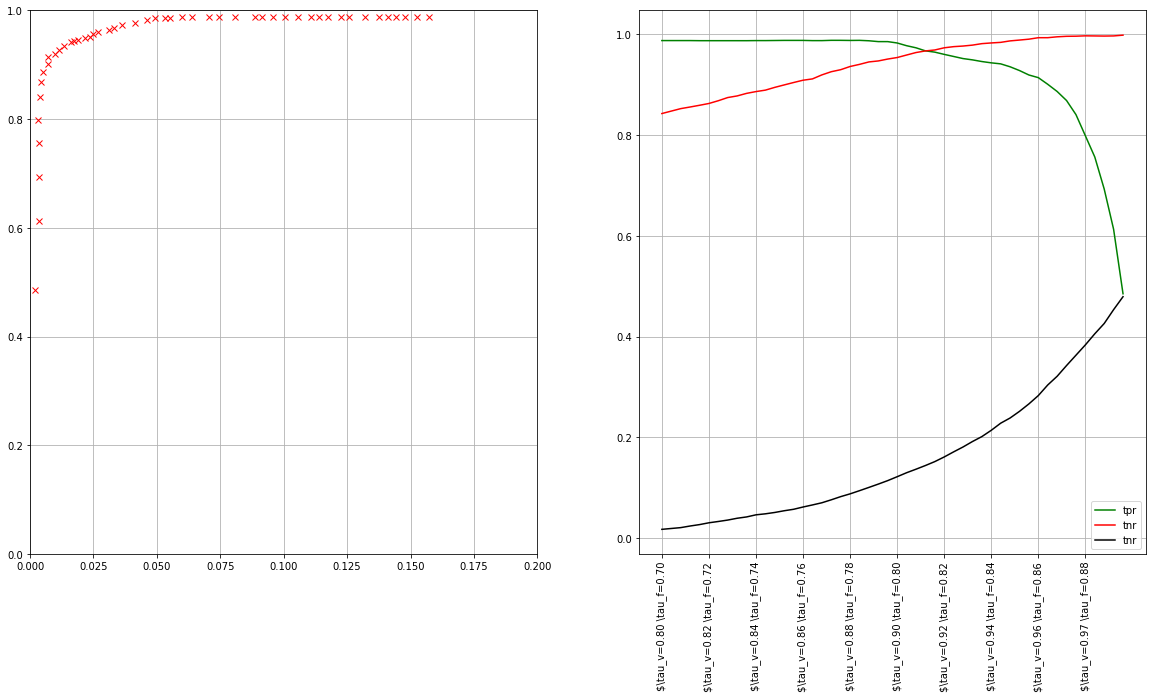

In [56]:
T_v_rng = np.linspace(0.80, 0.99, 50)
T_f_rng = np.linspace(0.70, 0.90, 50)
def compute_acc_optout(in_score, in_thres):
    # non-nan features
    nn_id = np.logical_not(np.isnan(in_score))
    return np.sum(in_score[nn_id]>in_thres)/np.sum(nn_id), (len(in_score)-np.sum(nn_id))/len(in_score)


def get_results(in_dict, in_key, t_v_rng, t_f_rng):
    
    tpr = np.zeros((N, ))
    fpr = np.zeros((N, ))
    acc_opt = np.zeros((N, ))


N = len(T_v_rng)
tpr = np.zeros((N, ))
fpr = np.zeros((N, ))
acc_opt = np.zeros((N, ))

for i in range(N):
        
        real_acc, real_opt = compute_acc_optout(ru.get_comb_Or_scaleMaxVGGFab(real_samples, 
                                                       mu_sigVGG=(T_v_rng[i], 0.0001), 
                                                       mu_sigFab=(T_f_rng[i], 0.0001)), 0.0001)
        fake_acc, fake_opt = compute_acc_optout(ru.get_comb_Or_scaleMaxVGGFab(fake_samples, 
                                                       mu_sigVGG=(T_v_rng[i], 0.0001), 
                                                       mu_sigFab=(T_f_rng[i], 0.0001)), 0.0001)
        
        tpr[i] = real_acc
        fpr[i] = fake_acc
        acc_opt[i] = (real_opt + fake_opt)/2




# plot the accuracies
# plot the two images 
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].plot(fpr, tpr, 'rx')
ax[0].grid(b=True)
ax[0].set_ylim([0.0, 1.0])
ax[0].set_xlim([0., .2])

ax[1].plot(tpr, 'g-', label='tpr')
ax[1].plot(1-fpr, 'r-', label='tnr')
ax[1].plot(acc_opt, 'k-', label='tnr')
ax[1].set_xticks(np.arange(0, len(fpr), 5))
ax[1].set_xticklabels([fr'$\tau_v={T_v_rng[x]:.2f} \tau_f={T_f_rng[x]:.2f}' for x in np.arange(0, len(fpr), 5)], rotation=90)
ax[1].grid(b=True)

ax[1].legend()

plt.show()





In [ ]:

np.save('result_csv/thres_abl_acc.npy', acc_img)
np.save('result_csv/thres_abl_opt.npy', acc_opt)


In [25]:

acc_img = np.zeros((len(T_v_rng), len(T_f_rng)))
acc_opt = np.zeros((len(T_v_rng), len(T_f_rng)))

real_samples = get_sample(result_dfs, ['ldr_real_100', 
                                       'FF_real_100', 
                                       'GG_real_100', 
                                      'DFDC_real_100', 
                                      'CDF_real_100'], n=1000)
fake_samples = get_sample(result_dfs, ['ldr_fake_100', 
                                       'FF_fake_100', 
                                       'GG_fake_100', 
                                      'DFDC_fake_100', 
                                      'CDF_fake_100'], n=1000)
for i in range(len(T_v_rng)):
    print(T_v_rng[i])
    for j in range(len(T_f_rng)):
        
        real_acc, real_opt = compute_acc_optout(ru.get_comb_Or_scaleMaxVGGFab(real_samples, 
                                                       mu_sigVGG=(T_v_rng[i], 0.0001), 
                                                       mu_sigFab=(T_f_rng[j], 0.0001)), 0.0001)
        fake_acc, fake_opt = compute_acc_optout(ru.get_comb_Or_scaleMaxVGGFab(fake_samples, 
                                                       mu_sigVGG=(T_v_rng[i], 0.0001), 
                                                       mu_sigFab=(T_f_rng[j], 0.0001)), 0.0001)
        
        acc_img[i, j] = (real_acc + (1-fake_acc))/2
        acc_opt[i, j] = (real_opt + fake_opt)/2

0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.6799999999999999
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.8500000000000001
0.86
0.87
0.88
0.89
0.9
0.9199999999999999
0.9299999999999999
0.94
0.95
0.96
0.97
0.98
0.99


In [41]:
acc_img = np.load('result_csv/thres_abl_acc.npy')
acc_opt = np.load('result_csv/thres_abl_opt.npy')

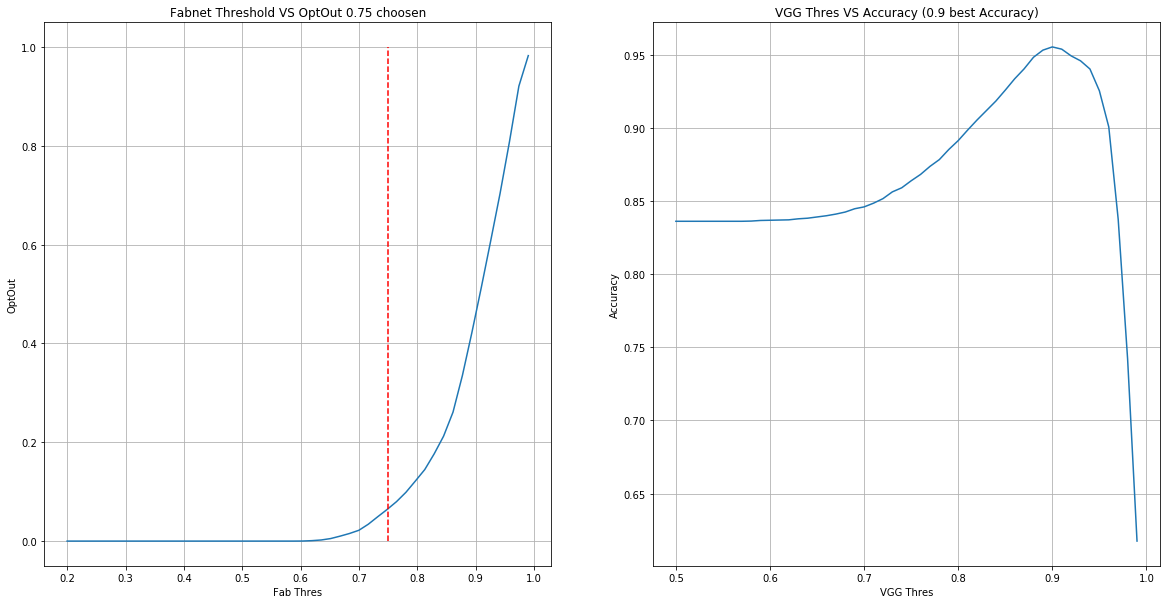

In [64]:
# plot the two images 
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].plot(T_f_rng, acc_opt[0, :])
ax[0].grid(b=True)
ax[0].plot([0.75, 0.75], [0, 1], 'r--')
ax[0].set_title('Fabnet Threshold VS OptOut 0.75 choosen')
ax[0].set_xlabel('Fab Thres')
ax[0].set_ylabel('OptOut')

n_tcks = 10
vgg_acc = acc_img[:, np.argmin(np.abs(T_f_rng - 0.75))]
ax[1].plot(T_v_rng, vgg_acc)
ax[1].grid(b=True)
#ax[1].plot([0.88, 0.88], [0, 1], 'r--')
ax[1].set_title('VGG Thres VS Accuracy (0.9 best Accuracy)')
ax[1].set_xlabel('VGG Thres')
ax[1].set_ylabel('Accuracy')

#u.add_colorbar(ax[1].imshow(acc_opt))

plt.show()



In [ ]:
ax[1].set_xticks(np.linspace(0, len(T_v_rng)+1, n_tcks).astype(np.int32))
ax[1].set_yticks(np.linspace(0, len(T_v_rng)+1, n_tcks).astype(np.int32))
# ... and label them with the respective list entries
ax[1].set_xticklabels([f'{x:0.2f}' for x in np.linspace(T_f_rng[0], T_f_rng[-1], n_tcks)], rotation=90)
ax[1].set_yticklabels([f'{x:0.2f}' for x in np.linspace(T_v_rng[0], T_v_rng[-1], n_tcks)])
ax[1].set_title('Average Accuracy')
ax[1].set_xlabel('Fab Thres')
ax[1].set_ylabel('VGG Thres')



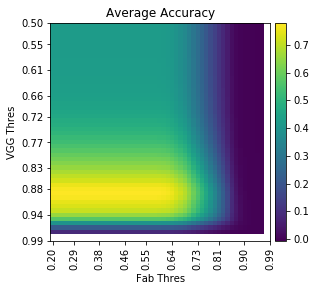

In [45]:
_, ax = plt.subplots(nrows=1, ncols=1)
u.add_colorbar(ax.imshow((acc_img / (acc_opt)**5))
ax.set_xticks(np.linspace(0, len(T_v_rng)+1, n_tcks).astype(np.int32))
ax.set_yticks(np.linspace(0, len(T_v_rng)+1, n_tcks).astype(np.int32))
# ... and label them with the respective list entries
ax.set_xticklabels([f'{x:0.2f}' for x in np.linspace(T_f_rng[0], T_f_rng[-1], n_tcks)], rotation=90)
ax.set_yticklabels([f'{x:0.2f}' for x in np.linspace(T_v_rng[0], T_v_rng[-1], n_tcks)])
ax.set_title('Average Accuracy')
ax.set_xlabel('Fab Thres')
ax.set_ylabel('VGG Thres')

plt.show()



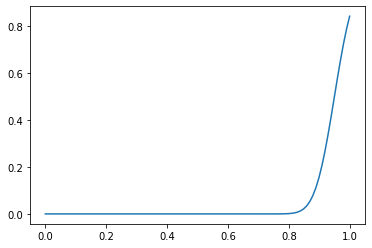

In [58]:
from scipy.stats import norm

x = np.linspace(0, 1, 100)
y = norm.cdf(x, 0.95, 0.05)

plt.plot(x,y)
plt.show()

# recall @ 1

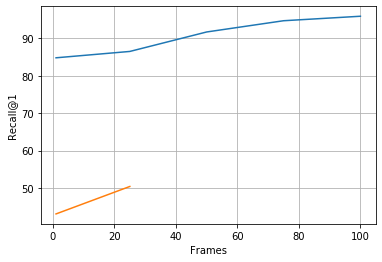

In [3]:
x = [1, 25, 50, 75, 100]
y_metric = [84.8,86.5,91.7,94.7,95.9]
y_nometric = [43.1, 50.43, np.nan, np.nan, np.nan]

plt.plot(x, y_metric, label='metric learning')
plt.plot(x, y_nometric, label='no metric learning')
plt.xlabel('Frames')
plt.ylabel('Recall@1')
plt.grid(b=True)
plt.show()

# discrepancy accuracy

In [6]:
def get_percent_in_df(in_df):
    
    face_id = np.array(in_df['actualLabel_vgg'])
    behav_id = np.array(in_df['actualLabel_behav'])
    vgg_id = ru.get_pred_label(in_df['sim_vgg'])
    fab_id = ru.get_pred_label(in_df['sim_fab'])
    
    out_dict = {}
    out_dict['consistent'] = len(np.argwhere(vgg_id == fab_id).ravel())/len(vgg_id)
    out_dict['vgg_face'] = len(np.argwhere(vgg_id == face_id).ravel())/len(vgg_id)
    out_dict['vgg_behav'] = len(np.argwhere(vgg_id == behav_id).ravel())/len(vgg_id)
    out_dict['vgg_other'] = len(np.argwhere((vgg_id != behav_id) & (vgg_id != face_id) ).ravel())/len(vgg_id)
    
    out_dict['fab_face'] = len(np.argwhere(fab_id == face_id).ravel())/len(vgg_id)
    out_dict['fab_behav'] = len(np.argwhere(fab_id == behav_id).ravel())/len(vgg_id)
    out_dict['fab_other'] = len(np.argwhere((fab_id != behav_id) & (fab_id != face_id) ).ravel())/len(vgg_id)
    
    return out_dict

# a plot with ids on the x axis, y axis is vgg/fabnet
def print_result_row(in_df, r_or_f):
    
    out_dict = get_percent_in_df(in_df)
    
    if r_or_f == 'fake':
        print('{0}\t|\t{1:0.2f}\t{2:0.2f}\t{3:0.2f}\t|\t{4:0.2f}\t{5:0.2f}\t{6:0.2f}\t|\t{7:0.2f}'.
              format(r_or_f, out_dict['vgg_face'], out_dict['vgg_behav'], out_dict['vgg_other'],
                     out_dict['fab_face'], out_dict['fab_behav'], out_dict['fab_other'], out_dict['consistent']))
        print('---------------------------------------------------------------------------------------------------')
    else:
        print('{0}\t|\t{1:0.2f}\tNA\t{2:0.2f}\t|\tNA\t{3:0.2f}\t{4:0.2f}\t|\t{5:0.2f}'.
              format(r_or_f, out_dict['vgg_face'], out_dict['vgg_other'],
                     out_dict['fab_face'], out_dict['fab_other'], out_dict['consistent']))
        print('---------------------------------------------------------------------------------------------------')
        
        

def result_per_db():
    
    print('Leaders')
    
    print('\t\t\tVGG\t\t\t\tFabnet\t\t\tConsistent\n')
    print('\t\tFaceId\tBehvId\tOther\t\tFaceId\tBehvId\tOther\n')
    print_result_row(result_dfs['ldr_real_100'], 'real')
    print_result_row(result_dfs['ldr_fake_100'], 'fake')

    print('FaceForensic \n')
    print_result_row(result_dfs['FF_real_100'], 'real')
    print_result_row(result_dfs['FF_fake_100'], 'fake')

    print('Google \n')
    print_result_row(result_dfs['GG_real_100'], 'real')
    print_result_row(result_dfs['GG_fake_100'], 'fake')
    
    print('DFDC \n')
    print_result_row(result_dfs['DFDC_real_100'], 'real')
    print_result_row(result_dfs['DFDC_fake_100'], 'fake')
    
    print('Jennifer \n')
    print_result_row(result_dfs['SJ_real_100'], 'real')
    print_result_row(result_dfs['SJ_fake_100'], 'fake')
    
    print('Celeb-DF \n')
    print_result_row(result_dfs['CDF_real_100'], 'real')
    print_result_row(result_dfs['CDF_fake_100'], 'fake')
    
    
result_per_db()

Leaders
			VGG				Fabnet			Consistent

		FaceId	BehvId	Other		FaceId	BehvId	Other

real	|	1.00	NA	0.00	|	NA	1.00	0.00	|	1.00
---------------------------------------------------------------------------------------------------
fake	|	0.96	0.04	0.00	|	0.01	0.98	0.00	|	0.05
---------------------------------------------------------------------------------------------------
FaceForensic 

real	|	1.00	NA	0.00	|	NA	0.99	0.01	|	0.99
---------------------------------------------------------------------------------------------------
fake	|	0.78	0.02	0.20	|	0.03	0.54	0.43	|	0.04
---------------------------------------------------------------------------------------------------
Google 

real	|	1.00	NA	0.00	|	NA	0.99	0.01	|	0.99
---------------------------------------------------------------------------------------------------
fake	|	0.48	0.35	0.17	|	0.00	0.96	0.03	|	0.34
---------------------------------------------------------------------------------------------------
DFDC 

real	|	0.96	NA	0.04	|	

## compute individual distance from face and behav id or agnostic

In [7]:
# get idividual distances
for k in result_dfs.keys():
    
    result_dfs[k]['scaleMaxVGG86_fab076'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.86, 0.0001), 
                                                                       mu_sigFab=(0.76, 0.0001))
    
    result_dfs[k]['scaleMaxVGG90_fab078'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.90, 0.0001), 
                                                                       mu_sigFab=(0.78, 0.0001))
    
    result_dfs[k]['scaleMaxVGG92_fab082'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.92, 0.0001), 
                                                                       mu_sigFab=(0.82, 0.0001))
    

In [ ]:
for k in result_dfs.keys():
    result_dfs[k]['consistency'] = ru.get_consistency(result_dfs[k])
    

## plot individual distance from face and behav id or agnostic

In [3]:
result_dfs = u.load_obj('result_csv', 'all_results_half_repo' )

KeyError: 'ldr_real_100'

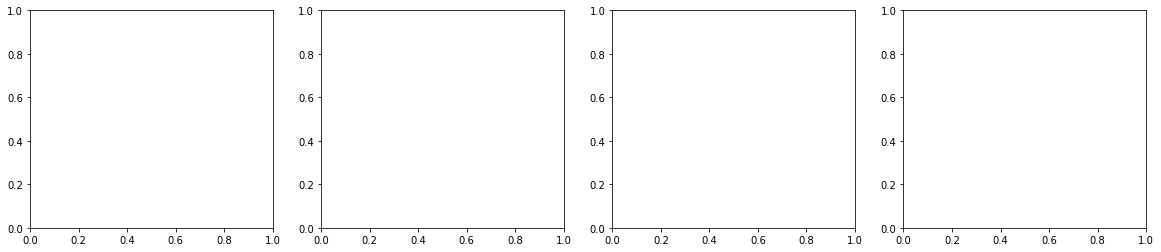

In [29]:

def plot_distribution(in_dict, in_keys, in_feat_nms, in_leg, title, ax):
    
    bins = np.linspace(0, 1, 25)
    for i in range(len(in_keys)):
        
        cur_arr = np.array(in_dict[in_keys[i]][in_feat_nms[i]].dropna())
        if np.std(cur_arr) == 0:
            cur_arr = cur_arr + np.random.normal(loc=0, scale=0.01, size=cur_arr.shape)
        sns.distplot(cur_arr, 
                     bins=bins, label=in_leg[i], ax=ax)
        ax.set_xticks(bins)
        ax.set_xticklabels([f'{x:.2f}' for x in bins], rotation=90)
        ax.legend()
        ax.set_title(title)
        ax.set_xlim([0.0, 1.0])
        ax.grid(b=True)
        

# plot the distances
def plot_one_row(in_pref):
    
    _, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
    real_key = in_pref + '_real_100'
    fake_key = in_pref + '_fake_100'
    
    plot_distribution(result_dfs, 
                      [real_key, fake_key, fake_key], 
                      ['vgg_face_id_sim', 'vgg_face_id_sim', 'vgg_behav_id_sim'], 
                      ['real_FId', 'fake_FId', 'fake_BId'], 'VGG from Face/Behav', ax=ax[0])
    plot_distribution(result_dfs, 
                      [real_key, fake_key, fake_key], 
                      ['fab_face_id_sim', 'fab_face_id_sim', 'fab_behav_id_sim'], 
                      ['real_FId', 'fake_FId', 'fake_BId'], 'Fab from Face/Behav', ax=ax[1])
    plot_distribution(result_dfs, [real_key, fake_key], 
                      ['only_vgg', 'only_vgg'], ['real', 'fake'], 
                      'only vgg', ax=ax[2])
    plot_distribution(result_dfs, 
                      [real_key, fake_key], 
                      ['only_fab', 'only_fab'], 
                      ['real', 'fake'], 
                      'only fab', ax=ax[3])
    
    plt.suptitle(in_pref)
    plt.show()
    
plot_one_row('ldr')
plot_one_row('FF')
plot_one_row('GG')
plot_one_row('DFDC')
#plot_one_row('SJ')
plot_one_row('CDF')


# get the DFDC sample fake videos

In [38]:
temp = result_dfs['DFDC_fake_100'].loc[:, ['fileName', 'vgg_face_id_sim', 'fab_behav_id_sim']].copy()

In [41]:
temp['diff'] = np.array(temp['vgg_face_id_sim']) - np.array(temp['fab_behav_id_sim'])

In [ ]:

display(temp.loc[temp['vgg_face_id_sim'] < temp['fab_behav_id_sim'], :].sort_values(by='diff', ascending=True).iloc[
    1000:, :])


## print accuracies

In [13]:
# a plot with ids on the x axis, y axis is vgg/fabnet
def print_sim_acc_row(in_dict, r_or_f, feat_nm, cur_thres=None, cutoff = 0.01):
    
    if r_or_f == 'real':
        keys = ['ldr_real_100',
                'FF_real_100',
                'GG_real_100',
                'DFDC_real_100', 
                'SJ_real_100',
               'CDF_real_100']
    else:
        keys = ['ldr_fake_100',
                'FF_fake_100',
                'GG_fake_100',
                'DFDC_fake_100', 
                'SJ_fake_100',
               'CDF_fake_100']
    
    if cur_thres==None:
        cur_thres = ru.compute_threshold(in_dict, keys, feat_nm, n=1000, cutoff = cutoff)
        print(f': {cur_thres:0.2f}', end='')
    
    print('')
    print(r_or_f, end='|')
    for k in keys:
        cur_acc, cur_optout = ru.compute_accuracy(in_dict[k], feat_nm, cur_thres)
        if r_or_f == 'real':
            print(f'\t{cur_acc:0.2f} ({cur_optout:0.2f})', end=' ')
        else:
            print(f'\t{(1-cur_acc):0.2f} ({cur_optout:0.2f})', end=' ')
                
    
    print('\n---------------------------------------------------------------------------------------------------')
    return cur_thres


    
def result_per_measure():
    
    print('\t\t\t1% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\t\tCDF\n')
    print('Only Fab', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_fab', cutoff = 0.01)
    print_sim_acc_row(result_dfs, 'fake', 'only_fab', cur_thres)
    print('\n')
    print('Only VGG', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_vgg', cutoff = 0.01)
    print_sim_acc_row(result_dfs, 'fake', 'only_vgg', cur_thres)
    print('\n---------------------------------------------------------------------------------------------------\n')
    
    print('\t\t\t2% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\n')
    print('Only Fab', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_fab', cutoff = 0.02)
    print_sim_acc_row(result_dfs, 'fake', 'only_fab', cur_thres)
    print('\n')
    print('Only VGG', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_vgg', cutoff = 0.02)
    print_sim_acc_row(result_dfs, 'fake', 'only_vgg', cur_thres)
    print('\n---------------------------------------------------------------------------------------------------\n')
    
    print('\t\t\t5% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\n')
    print('Only Fab', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_fab', cutoff = 0.05)
    print_sim_acc_row(result_dfs, 'fake', 'only_fab', cur_thres)
    print('\n')
    print('Only VGG', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_vgg', cutoff = 0.05)
    print_sim_acc_row(result_dfs, 'fake', 'only_vgg', cur_thres)

result_per_measure()

			1% reject
		ldr		FF		GG		DFDC		SJ		CDF

Only Fab : 0.76
real|	1.00 (0.00) 	0.99 (0.00) 	0.99 (0.00) 	1.00 (0.00) 	0.97 (0.00) 	0.98 (0.00) 
---------------------------------------------------------------------------------------------------

fake|	0.00 (0.00) 	0.45 (0.00) 	0.04 (0.00) 	0.04 (0.00) 	0.14 (0.00) 	0.06 (0.00) 
---------------------------------------------------------------------------------------------------


Only VGG : 0.86
real|	1.00 (0.00) 	1.00 (0.00) 	1.00 (0.00) 	1.00 (0.00) 	0.97 (0.00) 	0.99 (0.00) 
---------------------------------------------------------------------------------------------------

fake|	0.06 (0.00) 	0.76 (0.00) 	0.88 (0.00) 	0.69 (0.00) 	1.00 (0.00) 	0.89 (0.00) 
---------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------

			2% reject
		ldr		FF		GG		DFDC		SJ

Only Fab : 0.78
real|	1.00 (0.00) 	0.99 (0.00

In [40]:

# a plot with ids on the x axis, y axis is vgg/fabnet
def print_sim_acc_row(in_dict, r_or_f, feat_nm, cur_thres=None, cutoff = 0.01):
    
    if r_or_f == 'real':
        keys = ['SJ_real_100']
    else:
        keys = ['SJ_fake_100']
    
    if cur_thres==None:
        cur_thres = ru.compute_threshold(in_dict, keys, feat_nm, n=1000, cutoff = cutoff)
        print(f': {cur_thres:0.2f}', end='')
    
    print('')
    print(r_or_f, end='|')
    for k in keys:
        cur_acc, cur_optout = ru.compute_accuracy(in_dict[k], feat_nm, cur_thres)
        if r_or_f == 'real':
            print(f'\t{cur_acc:0.2f} ({cur_optout:0.2f})', end=' ')
        else:
            print(f'\t{(1-cur_acc):0.2f} ({cur_optout:0.2f})', end=' ')
                
    
    print('\n---------------------------------------------------------------------------------------------------')
    return cur_thres


    
def result_per_measure():
    
    print('\t\t\t1% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\t\tCDF\n')
    print('Max VGG 0.86 Fab 0.76', end=' ')
    print_sim_acc_row(result_dfs, 'real', 'scaleMaxVGG86_fab076', cur_thres = 0.0001)
    print_sim_acc_row(result_dfs, 'fake', 'scaleMaxVGG86_fab076', cur_thres = 0.0001)
    print('\n---------------------------------------------------------------------------------------------------\n')
    
    print('\t\t\t2% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\t\tCDF\n')
    print('\n')
    print('Max VGG 0.90 Fab 0.78', end=' ')
    print_sim_acc_row(result_dfs, 'real', 'scaleMaxVGG90_fab078', cur_thres = 0.0001)
    print_sim_acc_row(result_dfs, 'fake', 'scaleMaxVGG90_fab078', cur_thres = 0.0001)
    print('\n---------------------------------------------------------------------------------------------------\n')
    
result_per_measure()


			1% reject
		ldr		FF		GG		DFDC		SJ		CDF

Max VGG 0.86 Fab 0.76 
real|	0.86 (0.35) 
---------------------------------------------------------------------------------------------------

fake|	1.00 (0.34) 
---------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------

			2% reject
		ldr		FF		GG		DFDC		SJ		CDF



Max VGG 0.90 Fab 0.78 
real|	0.91 (0.48) 
---------------------------------------------------------------------------------------------------

fake|	1.00 (0.64) 
---------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------



In [18]:
# a plot with ids on the x axis, y axis is vgg/fabnet
def print_latex(in_dict):
    
    real_acc = np.zeros((3, ))
    fake_acc = np.zeros((3, ))
    real_opt = np.zeros((3, ))
    fake_opt = np.zeros((3, ))
    
    for k in ['ldr', 'FF', 'GG', 'DFDC', 'CDF']:
        
        print(k, end=' ')
        c=0
        for f in ['scaleMaxVGG86_fab076', 'scaleMaxVGG90_fab078', 'scaleMaxVGG92_fab082']:
            
            for r_or_f in ['real', 'fake']:
                
                nm = k + '_' + r_or_f + '_100'
                cur_acc, cur_optout = ru.compute_accuracy(in_dict[nm], f, 0.0001)
                if r_or_f == 'real':
                    cur_acc = cur_acc*100
                    real_acc[c] = real_acc[c] + cur_acc
                    real_opt[c] = real_opt[c] + cur_optout
                else:
                    cur_acc = (1-cur_acc)*100
                    fake_acc[c] = fake_acc[c] + cur_acc
                    fake_opt[c] = fake_opt[c] + cur_optout
                    
                print(f' & ${cur_acc:0.1f}$ (${cur_optout*100:0.1f}$)', end=' ')
            
            c=c+1
            print(' ', end=' ')
            
        print('\\\\ \n')
            
    for i in range(3):

        print(f' & ${real_acc[i]/5:0.1f}$ (${real_opt[i]*100/5:0.1f}$) & ${fake_acc[i]/5:0.1f}$ (${fake_opt[i]*100/5:0.1f}$)', end=' ')
    
print_latex(result_dfs)

ldr  & $100.0$ ($0.0$)  & $96.4$ ($0.0$)    & $97.9$ ($0.0$)  & $97.6$ ($0.2$)    & $90.2$ ($1.4$)  & $98.2$ ($4.8$)   \\ 

FF  & $99.6$ ($0.6$)  & $98.5$ ($44.6$)    & $99.6$ ($0.9$)  & $99.1$ ($56.3$)    & $99.5$ ($1.8$)  & $99.2$ ($76.2$)   \\ 

GG  & $99.4$ ($0.9$)  & $94.2$ ($4.4$)    & $99.3$ ($1.3$)  & $97.9$ ($7.1$)    & $99.3$ ($3.6$)  & $99.0$ ($17.3$)   \\ 

DFDC  & $96.0$ ($0.1$)  & $73.0$ ($4.2$)    & $95.6$ ($0.3$)  & $87.3$ ($7.2$)    & $95.1$ ($1.2$)  & $92.7$ ($17.5$)   \\ 

CDF  & $98.7$ ($1.7$)  & $99.4$ ($6.0$)    & $97.1$ ($2.8$)  & $99.9$ ($9.7$)    & $96.0$ ($6.9$)  & $99.9$ ($21.2$)   \\ 

 & $98.7$ ($0.7$) & $92.3$ ($11.9$)  & $97.9$ ($1.1$) & $96.4$ ($16.1$)  & $96.0$ ($3.0$) & $97.8$ ($27.4$) 

In [ ]:


    
def result_per_measure():
    
    print('\t\t\t1% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\t\tCDF\n')
    print('Max VGG 0.86 Fab 0.76', end=' ')
    print_sim_acc_row(result_dfs, 'real', 'scaleMaxVGG86_fab076', cur_thres = 0.0001)
    print_sim_acc_row(result_dfs, 'fake', 'scaleMaxVGG86_fab076', cur_thres = 0.0001)
    print('\n---------------------------------------------------------------------------------------------------\n')
    
    print('\t\t\t2% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\t\tCDF\n')
    print('\n')
    print('Max VGG 0.90 Fab 0.78', end=' ')
    print_sim_acc_row(result_dfs, 'real', 'scaleMaxVGG90_fab078', cur_thres = 0.0001)
    print_sim_acc_row(result_dfs, 'fake', 'scaleMaxVGG90_fab078', cur_thres = 0.0001)
    print('\n---------------------------------------------------------------------------------------------------\n')
    
    print('\t\t\t5% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\t\tCDF\n')
    print('\n')
    print('Max VGG 0.92 Fab 0.82', end=' ')
    print_sim_acc_row(result_dfs, 'real', 'scaleMaxVGG92_fab082', cur_thres = 0.0001)
    print_sim_acc_row(result_dfs, 'fake', 'scaleMaxVGG92_fab082', cur_thres = 0.0001)
    print('\n---------------------------------------------------------------------------------------------------\n')
    
result_per_measure()


In [10]:
# a plot with ids on the x axis, y axis is vgg/fabnet
def print_sim_acc_row(in_dict, r_or_f, feat_nm, cur_thres=None, cutoff = 0.01):
    
    if r_or_f == 'real':
        keys = ['ldr_real_100',
                'FF_real_100',
                'GG_real_100',
                'DFDC_real_100', 
                'SJ_real_100',
               'CDF_real_100']
    else:
        keys = ['ldr_fake_100',
                'FF_fake_100',
                'GG_fake_100',
                'DFDC_fake_100', 
                'SJ_fake_100',
               'CDF_fake_100']
    
    if cur_thres==None:
        cur_thres = ru.compute_threshold(in_dict, keys, feat_nm, n=1000, cutoff = cutoff)
        print(f': {cur_thres:0.2f}', end='')
    
    print('')
    print(r_or_f, end='|')
    for k in keys:
        cur_acc, cur_optout = ru.compute_accuracy(in_dict[k], feat_nm, cur_thres)
        if r_or_f == 'real':
            print(f'\t{cur_acc*100:0.1f} ({cur_optout*100:0.1f})', end=' ')
        else:
            print(f'\t{(1-cur_acc)*100:0.1f} ({cur_optout*100:0.1f})', end=' ')
                
    
    print('\n---------------------------------------------------------------------------------------------------')
    return cur_thres


    
def result_per_measure():
    
    print('\t\t\t1% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\t\tCDF\n')
    print('Max VGG 0.86 Fab 0.76', end=' ')
    print_sim_acc_row(result_dfs, 'real', 'scaleMaxVGG86_fab076', cur_thres = 0.0001)
    print_sim_acc_row(result_dfs, 'fake', 'scaleMaxVGG86_fab076', cur_thres = 0.0001)
    print('\n---------------------------------------------------------------------------------------------------\n')
    
    print('\t\t\t2% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\t\tCDF\n')
    print('\n')
    print('Max VGG 0.90 Fab 0.78', end=' ')
    print_sim_acc_row(result_dfs, 'real', 'scaleMaxVGG90_fab078', cur_thres = 0.0001)
    print_sim_acc_row(result_dfs, 'fake', 'scaleMaxVGG90_fab078', cur_thres = 0.0001)
    print('\n---------------------------------------------------------------------------------------------------\n')
    
    print('\t\t\t5% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\t\tCDF\n')
    print('\n')
    print('Max VGG 0.92 Fab 0.82', end=' ')
    print_sim_acc_row(result_dfs, 'real', 'scaleMaxVGG92_fab082', cur_thres = 0.0001)
    print_sim_acc_row(result_dfs, 'fake', 'scaleMaxVGG92_fab082', cur_thres = 0.0001)
    print('\n---------------------------------------------------------------------------------------------------\n')
    
result_per_measure()

			1% reject
		ldr		FF		GG		DFDC		SJ		CDF

Max VGG 0.86 Fab 0.76 
real|	100.0 (0.0) 	99.6 (0.6) 	99.4 (0.9) 	96.0 (0.1) 	85.8 (35.5) 	98.7 (1.7) 
---------------------------------------------------------------------------------------------------

fake|	96.4 (0.0) 	98.5 (44.6) 	94.2 (4.4) 	73.0 (4.2) 	100.0 (34.3) 	99.4 (6.0) 
---------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------

			2% reject
		ldr		FF		GG		DFDC		SJ		CDF



Max VGG 0.90 Fab 0.78 
real|	97.9 (0.0) 	99.6 (0.9) 	99.3 (1.3) 	95.6 (0.3) 	91.3 (48.4) 	97.1 (2.8) 
---------------------------------------------------------------------------------------------------

fake|	97.6 (0.2) 	99.1 (56.3) 	97.9 (7.1) 	87.3 (7.2) 	100.0 (64.0) 	99.9 (9.7) 
---------------------------------------------------------------------------------------------------

----------------------------------------

# compression


In [20]:
# a plot with ids on the x axis, y axis is vgg/fabnet
def print_sim_acc_comp(in_dict, r_or_f, feat_nm, cur_thres=None):
    
    if r_or_f == 'real':
        keys = ['ldr_real_100_comp',
                'FF_real_100_comp',
                'GG_real_100_comp',
                'DFDC_real_100_comp']
    else:
        keys = ['ldr_fake_100_comp',
                'FF_fake_100_comp',
                'GG_fake_100_comp',
                'DFDC_fake_100_comp']
    
    if cur_thres==None:
        cur_thres = ru.compute_threshold(in_dict, keys, feat_nm, n=1000, cutoff = 0.01)
        print(f': {cur_thres:0.2f}', end='')
    
    print('')
    print(r_or_f, end='|')
    for k in keys:
        cur_acc, cur_optout = ru.compute_accuracy(in_dict[k], feat_nm, cur_thres)
        if r_or_f == 'real':
            print(f'\t{cur_acc:0.2f} ({cur_optout:0.2f})', end=' ')
        else:
            print(f'\t{(1-cur_acc):0.2f} ({cur_optout:0.2f})', end=' ')
                
    
    print('\n---------------------------------------------------------------------------------------------------')
    return cur_thres


    
def result_comp():
    
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\n')
    print('\n')
    print('1% Reject Max VGG 0.86 Fab 0.76', end=' ')
    print_sim_acc_comp(result_dfs, 'real', 'scaleMaxVGG86_fab076', cur_thres = 0.0001)
    print_sim_acc_comp(result_dfs, 'fake', 'scaleMaxVGG86_fab076', cur_thres = 0.0001)
    print('\n')
    print('2% reject Max VGG 0.90 Fab 0.78', end=' ')
    print_sim_acc_comp(result_dfs, 'real', 'scaleMaxVGG90_fab078', cur_thres = 0.0001)
    print_sim_acc_comp(result_dfs, 'fake', 'scaleMaxVGG90_fab078', cur_thres = 0.0001)

result_comp()



		ldr		FF		GG		DFDC		SJ



1% Reject Max VGG 0.86 Fab 0.76 
real|	1.00 (0.00) 	0.97 (0.01) 	0.99 (0.01) 	0.87 (0.01) 
---------------------------------------------------------------------------------------------------

fake|	0.93 (0.01) 	0.99 (0.52) 	0.95 (0.06) 	0.82 (0.09) 
---------------------------------------------------------------------------------------------------


2% reject Max VGG 0.90 Fab 0.78 
real|	0.92 (0.00) 	0.92 (0.01) 	0.97 (0.01) 	0.81 (0.01) 
---------------------------------------------------------------------------------------------------

fake|	0.97 (0.03) 	0.99 (0.63) 	0.98 (0.10) 	0.94 (0.15) 
---------------------------------------------------------------------------------------------------


# plot the accuracies

In [60]:
# plot the dataset accuracies
# a plot with ids on the x axis, y axis is vgg/fabnet
def plot_sim_acc(in_dict, r_or_fs, feat_nm, cur_thres, ax):
    
    dataset_nm = ['ldr', 'FF', 'GG', 'DFDC', 'CDF', 'SJ']
    avg_acc = {}
    avg_opt = {}
    
    for k in dataset_nm:
        avg_acc[k] = 0
        avg_opt[k] = 0
    
    for r_or_f in r_or_fs:
        
        for k in dataset_nm:
            
            if r_or_f == 'real':
                cur_key = f'{k}_real_100'
            else:
                cur_key = f'{k}_fake_100'
        
            cur_acc, cur_optout = ru.compute_accuracy(in_dict[cur_key], feat_nm, cur_thres)
            if r_or_f == 'real':
                avg_acc[k] = avg_acc[k] + cur_acc
            else:
                avg_acc[k] = avg_acc[k] + (1-cur_acc)
            avg_opt[k] = avg_opt[k] + cur_optout
        
    # plot the data points
    ax[0].plot(np.arange(len(dataset_nm)), [avg_acc[k]/len(r_or_fs) for k in dataset_nm], label=feat_nm)
    ax[0].set_xticks(np.arange(len(dataset_nm)))
    ax[0].set_xticklabels(dataset_nm, rotation=90)
    ax[0].legend()
    ax[0].set_ylabel('Accuracy')
    ax[0].set_ylim([0, 1])
    ax[0].grid(b=True)
    
    ax[1].plot(np.arange(len(dataset_nm)), [avg_opt[k]/len(r_or_fs) for k in dataset_nm], label=feat_nm)
    ax[1].set_xticks(np.arange(len(dataset_nm)))
    ax[1].set_xticklabels(dataset_nm, rotation=90)
    ax[1].legend()
    ax[1].set_ylabel('OptOut')
    ax[1].set_ylim([0, 1])
    ax[1].grid(b=True)

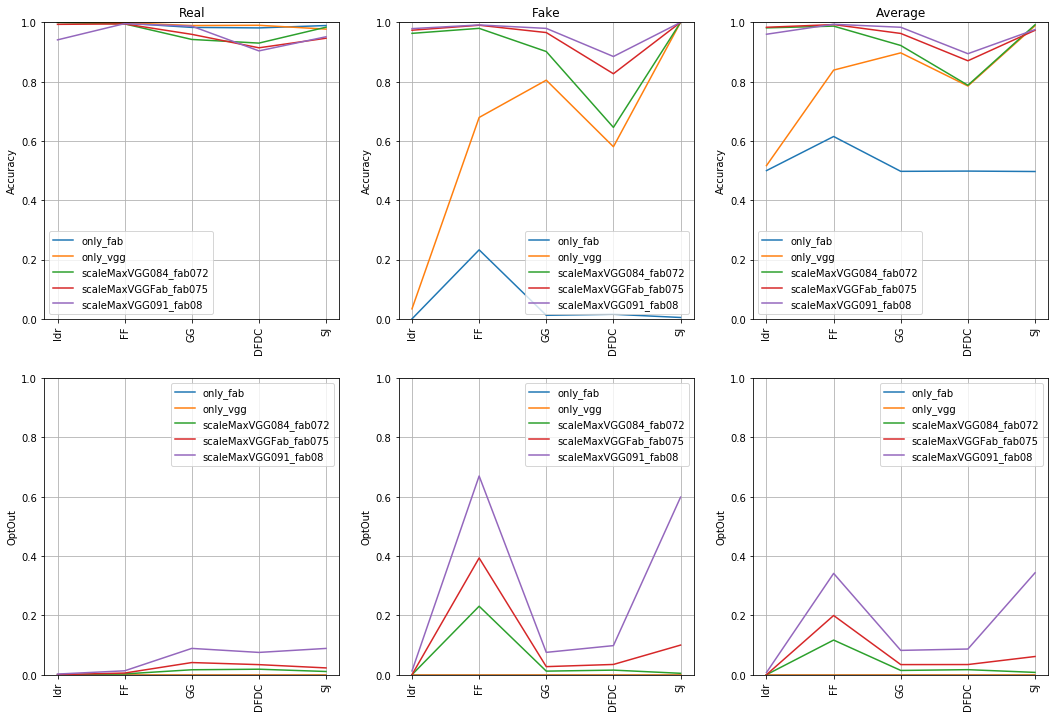

In [61]:
_, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


plot_sim_acc(result_dfs, ['real'], 'only_fab', cur_thres=0.72, ax=ax[:, 0])
plot_sim_acc(result_dfs, ['fake'], 'only_fab', cur_thres=0.72, ax=ax[:, 1])
plot_sim_acc(result_dfs, ['real','fake'], 'only_fab', cur_thres=0.72, ax=ax[:, 2])

plot_sim_acc(result_dfs, ['real'], 'only_vgg', cur_thres=0.84, ax=ax[:, 0])
plot_sim_acc(result_dfs, ['fake'], 'only_vgg', cur_thres=0.84, ax=ax[:, 1])
plot_sim_acc(result_dfs, ['real','fake'], 'only_vgg', cur_thres=0.84, ax=ax[:, 2])

plot_sim_acc(result_dfs, ['real'], 'scaleMaxVGG084_fab072', cur_thres=0.0001, ax=ax[:, 0])
plot_sim_acc(result_dfs, ['fake'], 'scaleMaxVGG084_fab072', cur_thres=0.0001, ax=ax[:, 1])
plot_sim_acc(result_dfs, ['real','fake'], 'scaleMaxVGG084_fab072', cur_thres=0.0001, ax=ax[:, 2])

plot_sim_acc(result_dfs, ['real'], 'scaleMaxVGGFab_fab075', cur_thres=0.0001, ax=ax[:, 0])
plot_sim_acc(result_dfs, ['fake'], 'scaleMaxVGGFab_fab075', cur_thres=0.0001, ax=ax[:, 1])
plot_sim_acc(result_dfs, ['real','fake'], 'scaleMaxVGGFab_fab075', cur_thres=0.0001, ax=ax[:, 2])

plot_sim_acc(result_dfs, ['real'], 'scaleMaxVGG091_fab08', cur_thres=0.0001, ax=ax[:, 0])
plot_sim_acc(result_dfs, ['fake'], 'scaleMaxVGG091_fab08', cur_thres=0.0001, ax=ax[:, 1])
plot_sim_acc(result_dfs, ['real','fake'], 'scaleMaxVGG091_fab08', cur_thres=0.0001, ax=ax[:, 2])

ax[0, 0].set_title('Real')
ax[0, 1].set_title('Fake')
ax[0, 2].set_title('Average')
plt.show()